#### use_day

使用全部的训练数据，还是仅使用整天的数据。
- 效果上看，使用整天的数据效果更好
- 两种情况下都在80次迭代处达到最好的效果，说明需要减小学习率

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/seq2seq_result_use_day.csv")

In [3]:
name_group = {"1.175656235322261":"smape", "multivariate_0_iteractions":"iteraction"}
df.rename(columns=name_group, inplace=True)
df['iteraction'] = df['iteraction'].apply(lambda x : x.split("_")[1])

In [4]:
df.sort_values(by="smape").head(10)

,iteraction,smape
78,80,0.656448
4,130,0.662749
33,400,0.684593
14,220,0.685847
2,110,0.689971
29,360,0.690649
96,970,0.695859
3,120,0.697356
52,570,0.698088
89,90,0.698489


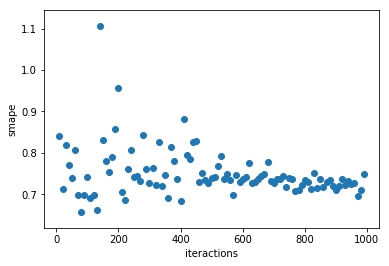

In [5]:
plt.scatter(df["iteraction"].values, df["smape"].values)
plt.xlabel("iteractions")
plt.ylabel("smape")

In [6]:
df = pd.read_csv("data/seq2seq_result_no_use_day.csv")

In [7]:
name_group = {"1.2978887264606485":"smape", "multivariate_0_iteractions":"iteraction"}
df.rename(columns=name_group, inplace=True)
df['iteraction'] = df['iteraction'].apply(lambda x : x.split("_")[1])

In [8]:
df.sort_values(by="smape").head(10)

,iteraction,smape
47,80,0.668480
0,100,0.678077
7,160,0.691710
48,90,0.702282
31,380,0.705131
23,30,0.713887
38,440,0.714284
10,190,0.716634
6,150,0.723689
18,260,0.737854


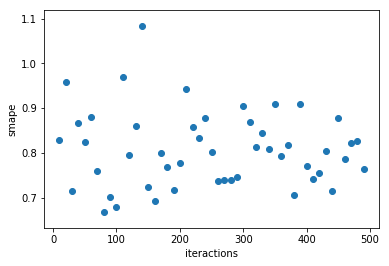

In [9]:
plt.scatter(df["iteraction"].values, df["smape"].values)
plt.xlabel("iteractions")
plt.ylabel("smape")

#### use meo

In [10]:
df = pd.read_csv("data/meo_and_aq_seq2seq_result.csv")

In [12]:
name_group = {"1.2090569966102747":"smape", "multivariate_0_iteractions":"iteraction"}
df.rename(columns=name_group, inplace=True)
df['iteraction'] = df['iteraction'].apply(lambda x : x.split("_")[1])

In [14]:
df.sort_values(by="smape").head(10)

,iteraction,smape
44,50,0.651125
47,80,0.651255
3,120,0.653970
17,250,0.689419
34,40,0.690858
2,110,0.702809
38,440,0.703454
42,480,0.709949
40,460,0.710117
0,100,0.711056


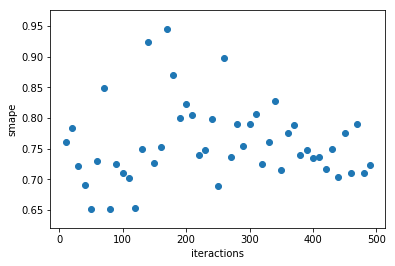

In [15]:
plt.scatter(df["iteraction"].values, df["smape"].values)
plt.xlabel("iteractions")
plt.ylabel("smape")